### Analisis Runtun Waktu pada Curah Hujan Kota Semarang ###

Import package yang dibutuhkan

In [1]:
import warnings
import itertools
import numpy as np
import matplotlib.pyplot as plt
warnings.filterwarnings("ignore")
plt.style.use('fivethirtyeight')
import pandas as pd
import statsmodels.api as sm
import seaborn as sns
import matplotlib

matplotlib.rcParams['axes.labelsize'] = 12
matplotlib.rcParams['xtick.labelsize'] = 10
matplotlib.rcParams['ytick.labelsize'] = 10
matplotlib.rcParams['text.color'] = 'k'

Import file yang berisi data curah hujan

In [2]:
data = pd.read_csv('curah hujan.csv')

Menyatukan data curah hujan menjadi satu kolom

In [3]:
data= pd.Series(data.values.ravel('F'))

In [4]:
data.head()

0    404
1    342
2    306
3    227
4     91
dtype: int64

In [5]:
data.dtypes

dtype('int64')

In [6]:
data.shape

(384,)

Membuat dataframe dari data

In [7]:
data1=pd.DataFrame(data=data,columns=['curah hujan'])
data1.head()

,curah hujan
0,404
1,342
2,306
3,227
4,91


Membuat isian data yaitu bulan-tahun

In [8]:
date1 = "1984-01"
date2 = "2015-12"

y0 = int( date1.split('-')[0] ) # 1984
y1 = int( date2.split('-')[0] ) # 2015

m0 = int( date1.split('-')[1] ) - 1 # 10-1 --> 9 because will be used for indexing
m1 = int( date2.split('-')[1] ) - 1 # 01-1 --> 0 because will be used for indexing

months = ['Jan', 'Feb', 'Mar', 'Apr', 'May', 'Jun', 'Jul', 'Aug', 'Sep', 'Oct', 'Nov', 'Dec']
result = []
start = m0
for y in range(y0, y1+1):
    for m in range(start,12):
        result.append( str( months[m  % 12])+'-'+str(y) )
        if y == y1 and (m % 12) == m1:
            break
    start = 0

print (result)

['Jan-1984', 'Feb-1984', 'Mar-1984', 'Apr-1984', 'May-1984', 'Jun-1984', 'Jul-1984', 'Aug-1984', 'Sep-1984', 'Oct-1984', 'Nov-1984', 'Dec-1984', 'Jan-1985', 'Feb-1985', 'Mar-1985', 'Apr-1985', 'May-1985', 'Jun-1985', 'Jul-1985', 'Aug-1985', 'Sep-1985', 'Oct-1985', 'Nov-1985', 'Dec-1985', 'Jan-1986', 'Feb-1986', 'Mar-1986', 'Apr-1986', 'May-1986', 'Jun-1986', 'Jul-1986', 'Aug-1986', 'Sep-1986', 'Oct-1986', 'Nov-1986', 'Dec-1986', 'Jan-1987', 'Feb-1987', 'Mar-1987', 'Apr-1987', 'May-1987', 'Jun-1987', 'Jul-1987', 'Aug-1987', 'Sep-1987', 'Oct-1987', 'Nov-1987', 'Dec-1987', 'Jan-1988', 'Feb-1988', 'Mar-1988', 'Apr-1988', 'May-1988', 'Jun-1988', 'Jul-1988', 'Aug-1988', 'Sep-1988', 'Oct-1988', 'Nov-1988', 'Dec-1988', 'Jan-1989', 'Feb-1989', 'Mar-1989', 'Apr-1989', 'May-1989', 'Jun-1989', 'Jul-1989', 'Aug-1989', 'Sep-1989', 'Oct-1989', 'Nov-1989', 'Dec-1989', 'Jan-1990', 'Feb-1990', 'Mar-1990', 'Apr-1990', 'May-1990', 'Jun-1990', 'Jul-1990', 'Aug-1990', 'Sep-1990', 'Oct-1990', 'Nov-1990', 'De

In [9]:
data2=pd.DataFrame(data=result,columns=['tanggal'])
data2.head()

,tanggal
0,Jan-1984
1,Feb-1984
2,Mar-1984
3,Apr-1984
4,May-1984


Menyatukan data1 dan data2 menjadi satu dataframe

In [10]:
data3=pd.concat([data2, data1],axis=1)

In [11]:
data3.dtypes

tanggal        object
curah hujan     int64
dtype: object

In [12]:
data3['tanggal']=pd.to_datetime(data3['tanggal'])
data3.head()

,tanggal,curah hujan
0,1984-01-01,404
1,1984-02-01,342
2,1984-03-01,306
3,1984-04-01,227
4,1984-05-01,91


In [13]:
data4=data3.set_index('tanggal')
data4.head()

,curah hujan
tanggal,
1984-01-01,404
1984-02-01,342
1984-03-01,306
1984-04-01,227
1984-05-01,91


Split data menjadi data training dan data testing

In [14]:
trainingSet=data4.iloc[:300,]
testSet=data4.iloc[300:,]
trainingSet.tail()

,curah hujan
tanggal,
2008-08-01,81
2008-09-01,70
2008-10-01,114
2008-11-01,304
2008-12-01,353


In [15]:
trainingSet.shape

(300, 1)

In [16]:
testSet.head()

,curah hujan
tanggal,
2009-01-01,225
2009-02-01,552
2009-03-01,75
2009-04-01,243
2009-05-01,354


In [17]:
tsTraining = trainingSet['curah hujan']
tsTraining.tail(10)

tanggal
2008-03-01    227
2008-04-01     85
2008-05-01     55
2008-06-01     58
2008-07-01      2
2008-08-01     81
2008-09-01     70
2008-10-01    114
2008-11-01    304
2008-12-01    353
Name: curah hujan, dtype: int64

In [18]:
tsTesting = testSet['curah hujan']
tsTesting['2009':]

tanggal
2009-01-01    225
2009-02-01    552
2009-03-01     75
2009-04-01    243
2009-05-01    354
2009-06-01    110
2009-07-01     46
2009-08-01     27
2009-09-01     78
2009-10-01     25
2009-11-01    171
2009-12-01    285
2010-01-01    433
2010-02-01    332
2010-03-01    337
2010-04-01    210
2010-05-01    263
2010-06-01    107
2010-07-01     79
2010-08-01    190
2010-09-01    171
2010-10-01    272
2010-11-01    205
2010-12-01    413
2011-01-01    253
2011-02-01    248
2011-03-01    183
2011-04-01    121
2011-05-01     81
2011-06-01     59
             ... 
2013-07-01    115
2013-08-01     82
2013-09-01     20
2013-10-01     99
2013-11-01    146
2013-12-01    242
2014-01-01    736
2014-02-01    377
2014-03-01    157
2014-04-01     74
2014-05-01    182
2014-06-01    129
2014-07-01    182
2014-08-01     10
2014-09-01      0
2014-10-01     45
2014-11-01    194
2014-12-01    193
2015-01-01    238
2015-02-01    273
2015-03-01    212
2015-04-01    258
2015-05-01    185
2015-06-01     69
20

membuat plot dari data training

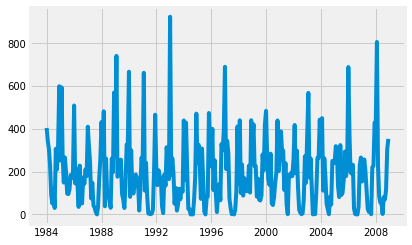

In [19]:
plt.plot(tsTraining)

Visualisasi data dengan metode dekomposisi, akan menguraikan data time series menjadi tiga komponen, yaitu tren, musim, dan noise.

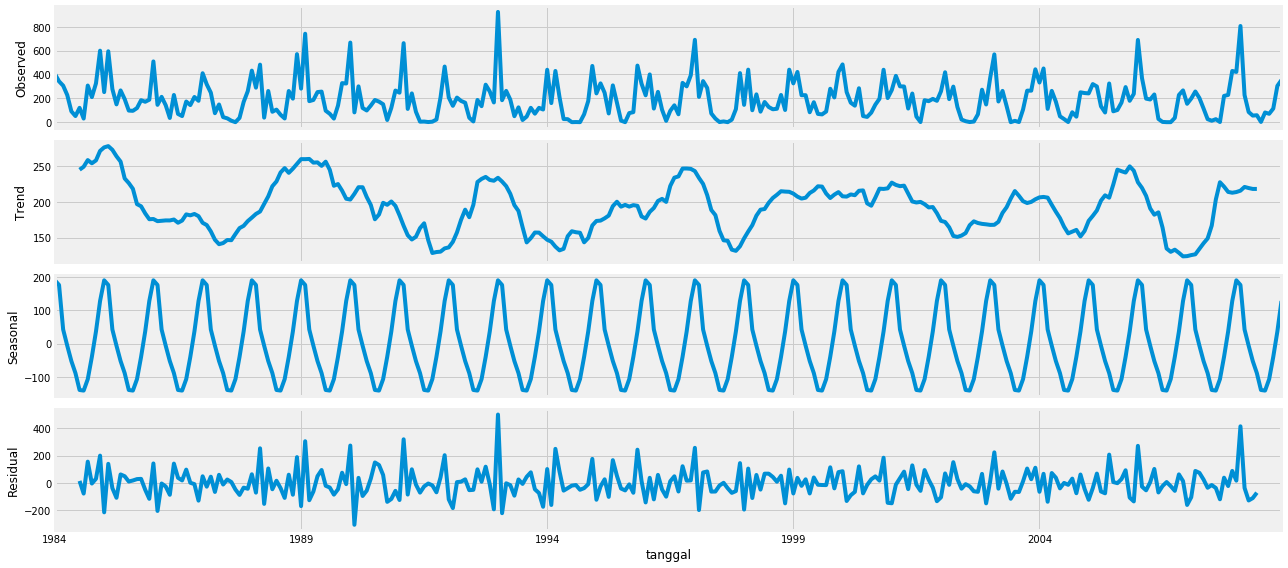

In [20]:
from pylab import rcParams
rcParams['figure.figsize'] = 18, 8
decomposition = sm.tsa.seasonal_decompose(tsTraining, model='additive')
fig = decomposition.plot()
plt.show()

Membuat fungsi untuk menguji stasioneritas data

In [21]:
from statsmodels.tsa.stattools import adfuller
def test_stationarity(timeseries):
    
    #Determing rolling statistics
    rolmean = pd.Series(timeseries).rolling(window=12).mean()
    rolstd = pd.Series(timeseries).rolling(window=12).std()

    #Plot rolling statistics:
    orig = plt.plot(timeseries, color='blue',label='Original')
    mean = plt.plot(rolmean, color='red', label='Rolling Mean')
    std = plt.plot(rolstd, color='black', label = 'Rolling Std')
    plt.legend(loc='best')
    plt.title('Rolling Mean & Standard Deviation')
    plt.show(block=False)
    
    #Perform Dickey-Fuller test:
    print ('Results of Dickey-Fuller Test:')
    dftest = adfuller(timeseries, autolag='AIC')
    dfoutput = pd.Series(dftest[0:4], index=['Test Statistic','p-value','#Lags Used','Number of Observations Used'])
    for key,value in dftest[4].items():
        dfoutput['Critical Value (%s)'%key] = value
    print (dfoutput)

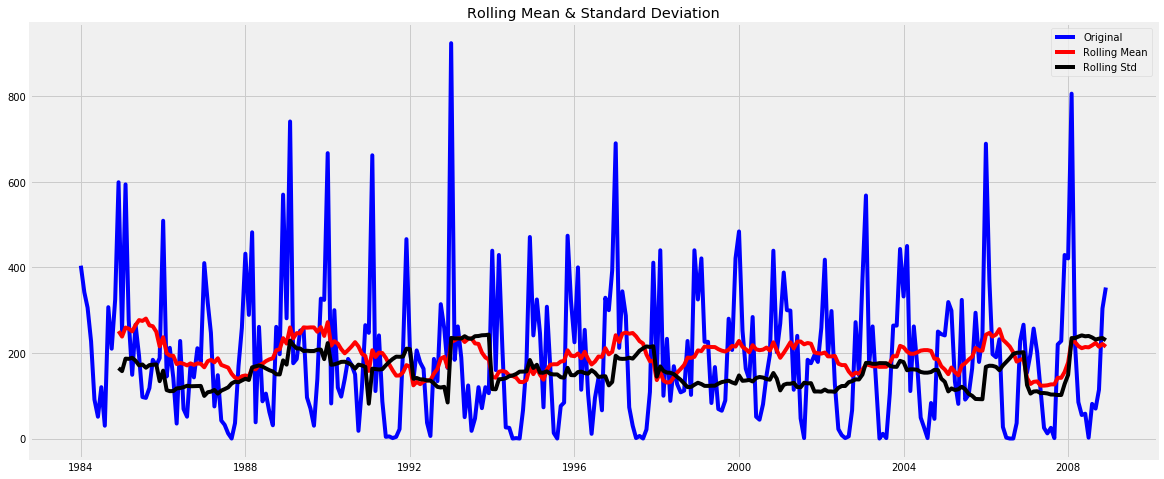

Results of Dickey-Fuller Test:
Test Statistic                  -5.530489
p-value                          0.000002
#Lags Used                      16.000000
Number of Observations Used    283.000000
Critical Value (1%)             -3.453670
Critical Value (5%)             -2.871808
Critical Value (10%)            -2.572241
dtype: float64


In [22]:
test_stationarity(tsTraining)

Import package yang dibutuhkan

In [23]:
from statsmodels.tsa.statespace.sarimax import SARIMAX
from statsmodels.tsa.statespace.sarimax import SARIMAXResults

Membuat plot ACF dan PACF

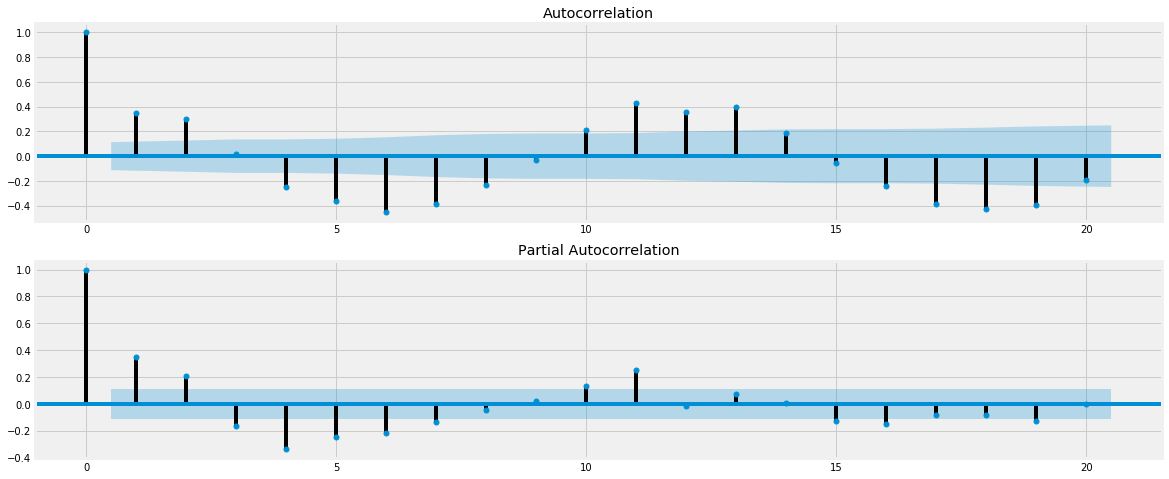

In [24]:
from statsmodels.graphics.tsaplots import plot_acf
from statsmodels.graphics.tsaplots import plot_pacf
from matplotlib import pyplot
pyplot.figure()
pyplot.subplot(211)
plot_acf(tsTraining, ax=pyplot.gca(),lags=20)
pyplot.subplot(212)
plot_pacf(tsTraining, ax=pyplot.gca(),lags=20)
pyplot.show()

membuat sebuah program untuk menentukan model SARIMA yang terbaik

In [25]:
#p = range(0, 1)
#d = range(0, 1)
#q = range(0, 3)
#pdq = list(itertools.product(p, d, q))
#seasonal_pdq = [(x[0], x[1], x[2], 12) for x in list(itertools.product(p, d, q))]

#for param in pdq:
#    for param_seasonal in seasonal_pdq:
#        try:
#            mod = sm.tsa.statespace.SARIMAX(tsTraining,
#                                            order=param,
#                                            seasonal_order=param_seasonal,
#                                            enforce_stationarity=False,
#                                            enforce_invertibility=False)

#            results = mod.fit()

#           print('ARIMA{}x{} - AIC:{}'.format(param, param_seasonal, results.aic))
#        except:
#            continue

import pmdarima as pm

smodel = pm.auto_arima(tsTraining, start_p=1, start_q=1,
                         test='adf',
                         max_p=2, max_q=2, m=12,
                         start_P=0, seasonal=True,
                         d=None, D=1, trace=True,
                         error_action='ignore',  
                         suppress_warnings=True, 
                         stepwise=True)

smodel.summary()

C:\Users\akuaa\Anaconda3\lib\site-packages\sklearn\externals\six.py:31: DeprecationWarning: The module is deprecated in version 0.21 and will be removed in version 0.23 since we've dropped support for Python 2.7. Please rely on the official version of six (https://pypi.org/project/six/).
  "(https://pypi.org/project/six/).", DeprecationWarning)
C:\Users\akuaa\Anaconda3\lib\site-packages\sklearn\externals\joblib\__init__.py:15: DeprecationWarning: sklearn.externals.joblib is deprecated in 0.21 and will be removed in 0.23. Please import this functionality directly from joblib, which can be installed with: pip install joblib. If this warning is raised when loading pickled models, you may need to re-serialize those models with scikit-learn 0.21+.
  warnings.warn(msg, category=DeprecationWarning)


Fit ARIMA: order=(1, 0, 1) seasonal_order=(0, 1, 1, 12); AIC=3585.585, BIC=3603.899, Fit time=5.562 seconds
Fit ARIMA: order=(0, 0, 0) seasonal_order=(0, 1, 0, 12); AIC=3791.375, BIC=3798.701, Fit time=0.078 seconds
Fit ARIMA: order=(1, 0, 0) seasonal_order=(1, 1, 0, 12); AIC=3683.079, BIC=3697.731, Fit time=2.375 seconds
Fit ARIMA: order=(0, 0, 1) seasonal_order=(0, 1, 1, 12); AIC=3578.500, BIC=3593.152, Fit time=3.547 seconds
Fit ARIMA: order=(0, 0, 1) seasonal_order=(1, 1, 1, 12); AIC=3566.339, BIC=3584.654, Fit time=2.547 seconds
Fit ARIMA: order=(0, 0, 1) seasonal_order=(1, 1, 0, 12); AIC=3685.247, BIC=3699.899, Fit time=1.062 seconds
Fit ARIMA: order=(0, 0, 1) seasonal_order=(1, 1, 2, 12); AIC=3565.139, BIC=3587.116, Fit time=13.878 seconds
Fit ARIMA: order=(1, 0, 1) seasonal_order=(1, 1, 2, 12); AIC=3585.639, BIC=3611.279, Fit time=20.017 seconds
Fit ARIMA: order=(0, 0, 0) seasonal_order=(1, 1, 2, 12); AIC=3570.269, BIC=3588.584, Fit time=15.421 seconds
Fit ARIMA: order=(0, 0, 2

<class 'statsmodels.iolib.summary.Summary'>
"""
                                 Statespace Model Results                                 
==========================================================================================
Dep. Variable:                                  y   No. Observations:                  300
Model:             SARIMAX(0, 0, 2)x(0, 1, 2, 12)   Log Likelihood               -1772.079
Date:                            Sat, 05 Oct 2019   AIC                           3556.158
Time:                                    22:42:14   BIC                           3578.136
Sample:                                         0   HQIC                          3564.966
                                            - 300                                         
Covariance Type:                              opg                                         
==============================================================================
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
intercept     -0.6476      0.833     -0.777      0.437      -2.281       0.985
ma.L1         -0.1489      0.061     -2.438      0.015      -0.269      -0.029
ma.L2          0.1782      0.055      3.213      0.001       0.069       0.287
ma.S.L12      -1.2121      0.063    -19.373      0.000      -1.335      -1.089
ma.S.L24       0.2669      0.053      5.049      0.000       0.163       0.370
sigma2      1.165e+04    936.813     12.433      0.000    9811.037    1.35e+04
===================================================================================
Ljung-Box (Q):                       22.70   Jarque-Bera (JB):                34.24
Prob(Q):                              0.99   Prob(JB):                         0.00
Heteroskedasticity (H):               0.88   Skew:                             0.60
Prob(H) (two-sided):                  0.52   Kurtosis:                         4.19
===================================================================================

Warnings:
[1] Covariance matrix calculated using the outer product of gradients (complex-step).
"""

Melakukan fitting data training dengan model terbaik yang telah didapatkan

In [26]:
mod = sm.tsa.statespace.SARIMAX(tsTraining,
                                order=(0, 0, 2),
                                seasonal_order=(0, 1, 2, 12),
                                enforce_stationarity=False,
                                enforce_invertibility=False)
results = mod.fit()
#print(results.summary().tables[1])
#print(results.summary())
#results.aic

C:\Users\akuaa\Anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:165: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  % freq, ValueWarning)


menjalankan diagnostik pada model untuk menyelidiki perilaku dalam model yang tidak biasa

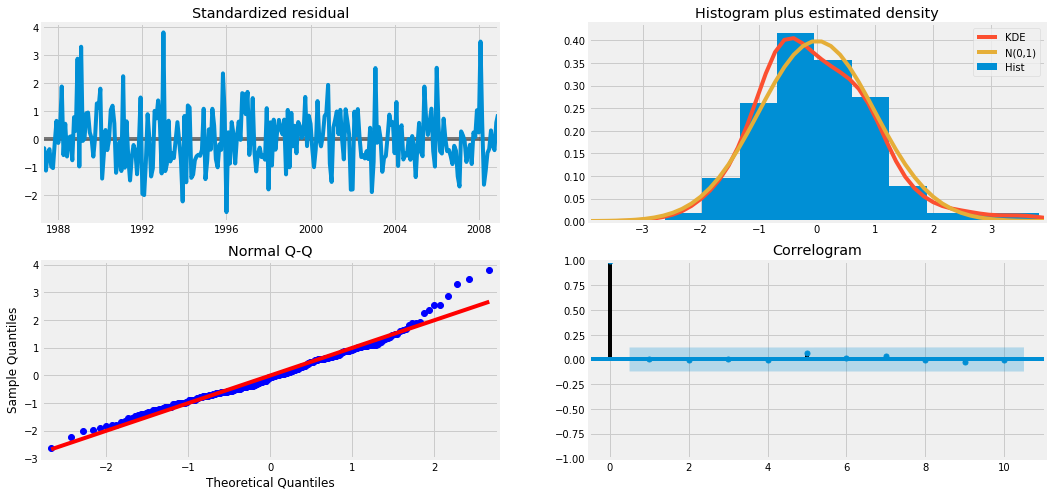

In [27]:
results.plot_diagnostics(figsize=(16, 8))
plt.show()

Melakukan prediksi pada data testing, kemudian dibandingkan dengan data sebenarnya pada data testing

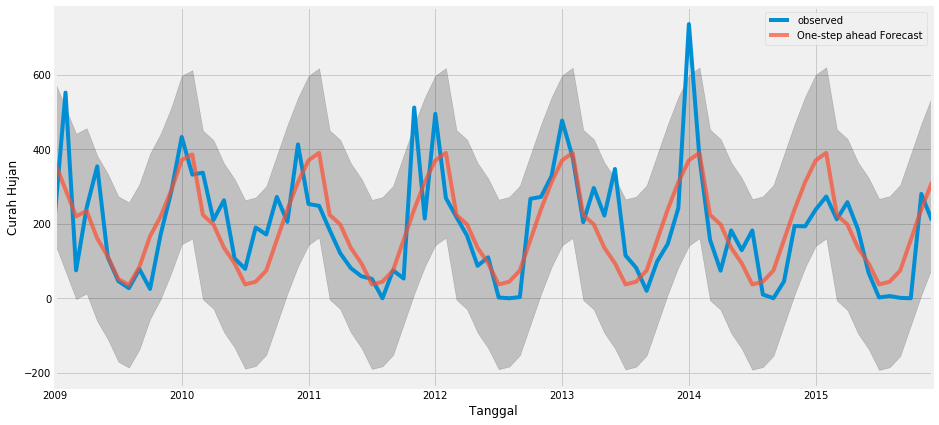

In [28]:
pred = results.get_prediction(pd.to_datetime('2009-01-01'), pd.to_datetime('2015-12-01'), dynamic=False)
pred_ci = pred.conf_int()
ax = tsTesting['2009':].plot(label='observed')
pred.predicted_mean.plot(ax=ax, label='One-step ahead Forecast', alpha=.7, figsize=(14, 7))
ax.fill_between(pred_ci.index,
                pred_ci.iloc[:, 0],
                pred_ci.iloc[:, 1], color='k', alpha=.2)
ax.set_xlabel('Tanggal')
ax.set_ylabel('Curah Hujan')
plt.legend()
plt.show()

mencari MSE pada model

In [29]:
ts_forecasted = pred.predicted_mean
ts_truth = tsTesting['2009-01-01':]
mse = ((ts_forecasted - ts_truth) ** 2).mean()
print('The Mean Squared Error of our forecasts is {}'.format(round(mse, 2)))

The Mean Squared Error of our forecasts is 10434.52


Menampilkan RMSE pada model

In [30]:
print('The Root Mean Squared Error of our forecasts is {}'.format(round(np.sqrt(mse), 2)))

The Root Mean Squared Error of our forecasts is 102.15


Melakukan forecast sebanyak 200 bulan ke depan, dari bulan Januari 2009

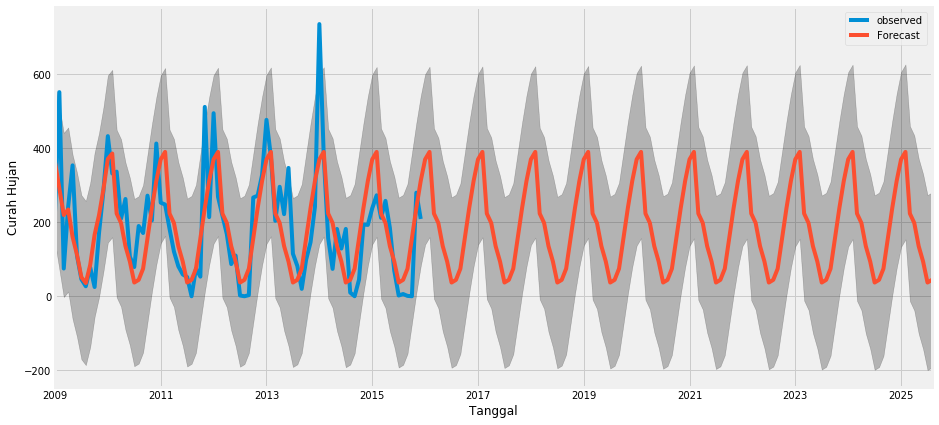

In [31]:
pred_uc = results.get_forecast(steps=200)
pred_ci = pred_uc.conf_int()
ax = tsTesting.plot(label='observed', figsize=(14, 7))
pred_uc.predicted_mean.plot(ax=ax, label='Forecast')
ax.fill_between(pred_ci.index,
                pred_ci.iloc[:, 0],
                pred_ci.iloc[:, 1], color='k', alpha=.25)
ax.set_xlabel('Tanggal')
ax.set_ylabel('Curah Hujan')
plt.legend()
plt.show()

In [32]:
#outliers=[]

#def detect_outlier(data_1):
    
#    threshold=3
#    mean_1 = np.mean(data_1)
#    std_1 =np.std(data_1)
    
    
#    for y in data_1:
#        z_score= (y - mean_1)/std_1 
#        if np.abs(z_score) > threshold:
#            outliers.append(y)
#    return outliers

In [33]:
#residual=pd.DataFrame(results.resid, columns=['resid'])
#residual.head()

In [34]:
#detect_outlier(results.resid)

In [35]:
#print(residual.loc[residual['resid'].isin([404.0, 599.1017499551627, -406.5570207249509, -440.87473870410076, 417.18286060850596, 434.9144085263339])])

In [36]:
#x1=np.genfromtxt(fname='x1.txt')

In [37]:
#x1_dummy=pd.DataFrame(x1, columns=['x1'])

In [38]:
#data3_tanggal=data3['tanggal']

In [39]:
#x1_dummy1=pd.concat([data3_tanggal,x1_dummy], axis=1)
#x1_dummy2=x1_dummy1.set_index('tanggal')

In [40]:
#x1_dummy3=x1_dummy2.iloc[:300,]

Melakukan transformasi pada data training, dengan menggunakan transformasi square-root

In [41]:
ts_sqrt = np.sqrt(tsTraining)

Melakukan tes stasioner pada data yang telah ditransformasi

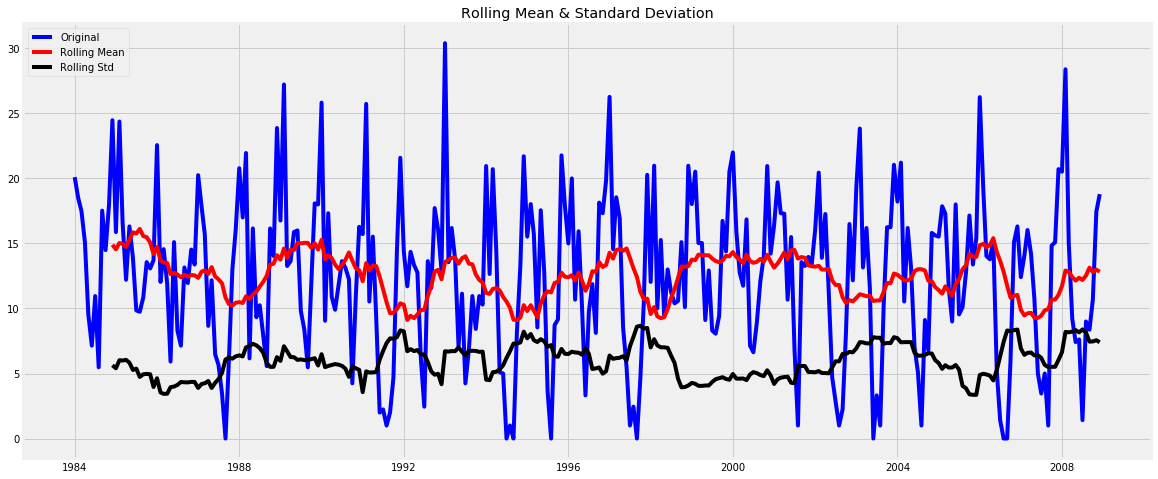

Results of Dickey-Fuller Test:
Test Statistic                  -5.002698
p-value                          0.000022
#Lags Used                      16.000000
Number of Observations Used    283.000000
Critical Value (1%)             -3.453670
Critical Value (5%)             -2.871808
Critical Value (10%)            -2.572241
dtype: float64


In [42]:
test_stationarity(ts_sqrt)

Proses pencarian kembali model yang terbaik

In [43]:
import pmdarima as pm

smodel2 = pm.auto_arima(ts_sqrt, start_p=0, start_q=0,
                         test='adf',
                         max_p=3, max_q=2, m=12,
                         start_P=0, seasonal=True,
                         d=1,max_d=2, max_D=2, D=1, trace=True,
                         error_action='ignore',  
                         suppress_warnings=True, 
                         stepwise=True)

smodel2.summary()

Fit ARIMA: order=(0, 1, 0) seasonal_order=(0, 1, 1, 12); AIC=1842.427, BIC=1853.406, Fit time=1.828 seconds
Fit ARIMA: order=(0, 1, 0) seasonal_order=(0, 1, 0, 12); AIC=2036.683, BIC=2044.002, Fit time=0.047 seconds
Fit ARIMA: order=(1, 1, 0) seasonal_order=(1, 1, 0, 12); AIC=1828.779, BIC=1843.417, Fit time=0.891 seconds
Fit ARIMA: order=(0, 1, 1) seasonal_order=(0, 1, 1, 12); AIC=1681.842, BIC=1696.480, Fit time=3.734 seconds
Fit ARIMA: order=(0, 1, 1) seasonal_order=(1, 1, 1, 12); AIC=1677.073, BIC=1695.371, Fit time=2.750 seconds
Fit ARIMA: order=(0, 1, 1) seasonal_order=(1, 1, 0, 12); AIC=1782.346, BIC=1796.984, Fit time=0.750 seconds
Fit ARIMA: order=(0, 1, 1) seasonal_order=(1, 1, 2, 12); AIC=1676.533, BIC=1698.490, Fit time=12.000 seconds
Fit ARIMA: order=(1, 1, 1) seasonal_order=(1, 1, 2, 12); AIC=1679.765, BIC=1705.381, Fit time=14.078 seconds
Fit ARIMA: order=(0, 1, 0) seasonal_order=(1, 1, 2, 12); AIC=1840.072, BIC=1858.369, Fit time=8.750 seconds
Fit ARIMA: order=(0, 1, 2)

<class 'statsmodels.iolib.summary.Summary'>
"""
                                 Statespace Model Results                                 
==========================================================================================
Dep. Variable:                                  y   No. Observations:                  300
Model:             SARIMAX(0, 1, 1)x(0, 1, 2, 12)   Log Likelihood                -832.852
Date:                            Sat, 05 Oct 2019   AIC                           1675.704
Time:                                    22:44:28   BIC                           1694.001
Sample:                                         0   HQIC                          1683.037
                                            - 300                                         
Covariance Type:                              opg                                         
==============================================================================
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
intercept      0.0013      0.004      0.360      0.719      -0.006       0.009
ma.L1         -0.8998      0.029    -30.971      0.000      -0.957      -0.843
ma.S.L12      -1.1282      0.066    -17.190      0.000      -1.257      -1.000
ma.S.L24       0.1967      0.060      3.292      0.001       0.080       0.314
sigma2        17.5149      1.846      9.489      0.000      13.897      21.133
===================================================================================
Ljung-Box (Q):                       37.42   Jarque-Bera (JB):                 4.38
Prob(Q):                              0.59   Prob(JB):                         0.11
Heteroskedasticity (H):               0.80   Skew:                             0.03
Prob(H) (two-sided):                  0.27   Kurtosis:                         2.40
===================================================================================

Warnings:
[1] Covariance matrix calculated using the outer product of gradients (complex-step).
"""

In [44]:
mod2 = sm.tsa.statespace.SARIMAX(ts_sqrt,
                                order=(0, 1, 1),
                                seasonal_order=(0, 1, 2, 12),
                                enforce_stationarity=False,
                                enforce_invertibility=False)
results2 = mod2.fit()
#print(results.summary().tables[1])

C:\Users\akuaa\Anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:165: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  % freq, ValueWarning)


Meingidentifikasi residual model sarima

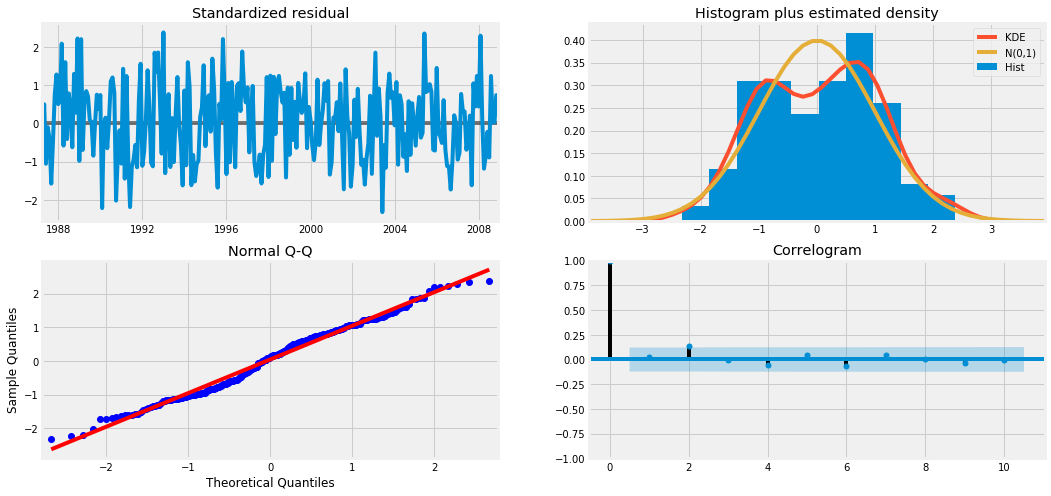

In [45]:
results2.plot_diagnostics(figsize=(16,8))
plt.show()

Melakukan prediksi pada data testing, kemudian dibandingkan dengan data sebenarnya pada data testing

In [64]:
pred2 = results2.get_prediction(pd.to_datetime('2009-01-01'), pd.to_datetime('2015-12-01'), dynamic=False)
pred_ci2 = pred2.conf_int()

In [65]:
pred2_1=pred2.predicted_mean
pred2_2=pred2_1**2

In [66]:
pred_ci2_1=pred_ci2**2

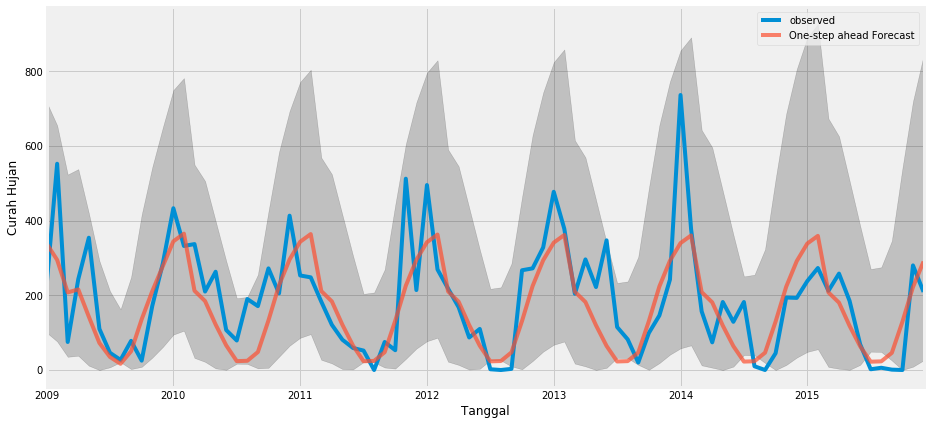

In [67]:
ax = tsTesting['2009':].plot(label='observed')
pred2_2.plot(ax=ax, label='One-step ahead Forecast', alpha=.7, figsize=(14, 7))
ax.fill_between(pred_ci2_1.index,
                pred_ci2_1.iloc[:, 0],
                pred_ci2_1.iloc[:, 1], color='k', alpha=.2)
ax.set_xlabel('Tanggal')
ax.set_ylabel('Curah Hujan')
plt.legend()
plt.show()

Mencari MSE pada model

In [68]:
ts_forecasted = pred2_2
ts_truth = tsTesting['2009-01-01':]
mse = ((ts_forecasted - ts_truth) ** 2).mean()
print('The Mean Squared Error of our forecasts is {}'.format(round(mse, 2)))

The Mean Squared Error of our forecasts is 10673.63


Menampilkan RMSE pada model

In [69]:
print('The Root Mean Squared Error of our forecasts is {}'.format(round(np.sqrt(mse), 2)))

The Root Mean Squared Error of our forecasts is 103.31


Melakukan forecast sebanyak 200 bulan ke depan, dari bulan Januari 2009

In [70]:
pred_uc2 = results2.get_forecast(steps=200)
pred_ci2 = pred_uc2.conf_int()

In [71]:
pred_uc2_1=pred_uc2.predicted_mean
pred_uc2_2=pred_uc2_1**2

In [72]:
pred_ci2_1=pred_ci2**2

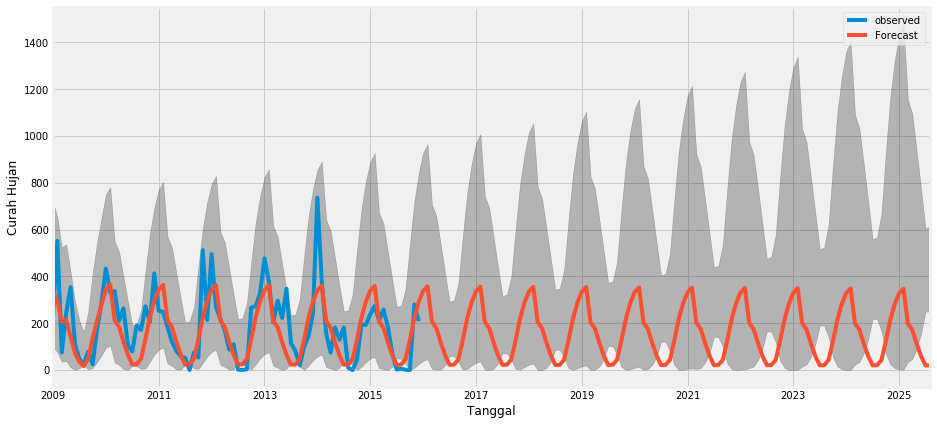

In [73]:
ax = tsTesting.plot(label='observed', figsize=(14, 7))
pred_uc2_2.plot(ax=ax, label='Forecast')
ax.fill_between(pred_ci2_1.index,
                pred_ci2_1.iloc[:, 0],
                pred_ci2_1.iloc[:, 1], color='k', alpha=.25)
ax.set_xlabel('Tanggal')
ax.set_ylabel('Curah Hujan')
plt.legend()
plt.show()